Analysis of P5 RGC atlas from Rheaume et al. 2018

In [1]:
#imports
import numpy as np
import pandas as pd
import plotnine as pn
import anndata as ad
import scanpy as sc
#import scFates as scf
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

c:\Users\james\mambaforge\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
#Create anndata from matrix, sample info, gene table
sX = pd.read_csv("F:/Lab/trakthenberg/X.txt",'\t')
sobs = pd.read_csv("F:/Lab/trakthenberg/sample_info.txt","\t")
svars = pd.read_csv("F:/Lab/trakthenberg/var.txt","\t")
svars = svars.set_index("gene_id")

sX = sX.set_index("gene_id").T
sX = sX.sort_index()
sobs = sobs.set_index("Cell")
sobs = sobs.sort_index()

C:\Users\james\AppData\Local\Temp\ipykernel_12084\3312304406.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
C:\Users\james\AppData\Local\Temp\ipykernel_12084\3312304406.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
C:\Users\james\AppData\Local\Temp\ipykernel_12084\3312304406.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.


In [10]:
#or input anndata object
adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_scanpy.h5ad")

In [ ]:
svars = pd.read_csv("F:/Lab/trakthenberg/var.txt","\t")
svars = svars.set_index("gene_id")

C:\Users\james\AppData\Local\Temp\ipykernel_12084\4181722824.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.


In [ ]:
adata = ad.AnnData(X=sX, obs = sobs, var=svars)

In [ ]:
adata.var['gene_short_name']=adata.var['gene_short_name'].astype("str")

In [ ]:
lst = adata.var['gene_short_name'].tolist()

In [ ]:
adata.var.index = lst

In [ ]:
adata.var_names

Index(['Gnai3', 'Cdc45', 'H19', 'Scml2', 'Apoh', 'Narf', 'Cav2', 'Klf6',
       'Scmh1', 'Cox5a',
       ...
       'Gm45159', 'Gm45187', 'Dcst2', 'Prmt1', 'Samd4b', 'A230057D06Rik-2',
       'Gm45163', 'B930025P03Rik', 'Nup62', 'A230057D06Rik'],
      dtype='object', length=13616)

In [ ]:
adata.var.index.is_unique

False

In [ ]:
#make unique gene names
adata.var_names_make_unique() 

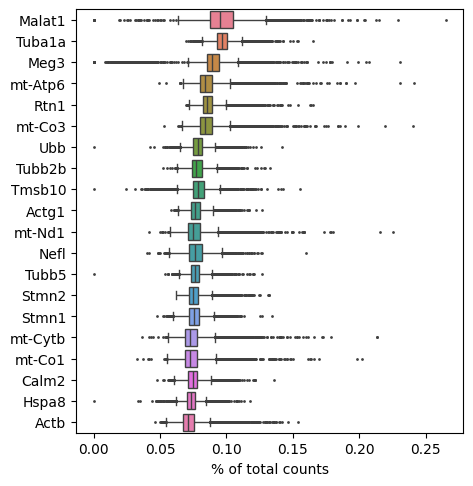

In [3]:
#Highest expressed genes
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
sc.pp.filter_cells(adata, min_genes=200) #filter cells by minimum num of genes
sc.pp.filter_genes(adata, min_cells=3) #filter genes by minimum number of expressing cells

In [ ]:
nonRGC = adata.obs_vector("Rbpms") < 0.5 #filter out non-RGCs based off of Rbpms expression
adata = adata[~nonRGC]

In [ ]:
adata.obs

Cluster  Eye  n_genes
Cell                                     
AAACCTGAGTGCCAGA.1        1    1     4716
AAACCTGCAAACTGCT.2        9    2     4687
AAACCTGCAAGAGGCT.2        4    2     5138
AAACCTGCAAGCCGCT.2        7    2     4518
AAACCTGCAAGTAATG.2        4    2     5427
...                     ...  ...      ...
TTTGTCAGTGGCGAAT.1       34    1     5796
TTTGTCATCACAAACC.2       26    2     6071
TTTGTCATCCGCATCT.1        3    1     5095
TTTGTCATCGATGAGG.2       13    2     4365
TTTGTCATCTGATTCT.1        1    1     3179

[6186 rows x 3 columns]

In [ ]:
# Identify mitochondrial genes if the gene has mt-
adata.var['mt'] = adata.var_names.str.startswith('mt-')  
adata.var

gene_short_name     mt
Gnai3                      Gnai3  False
Cdc45                      Cdc45  False
H19                          H19  False
Scml2                      Scml2  False
Apoh                        Apoh  False
...                          ...    ...
A230057D06Rik-2  A230057D06Rik-2  False
Gm45163                  Gm45163  False
B930025P03Rik      B930025P03Rik  False
Nup62                      Nup62  False
A230057D06Rik      A230057D06Rik  False

[13616 rows x 2 columns]

In [ ]:
#qc metric of mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

c:\Users\james\mambaforge\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 93'. Pick better value with 'binwidth'.


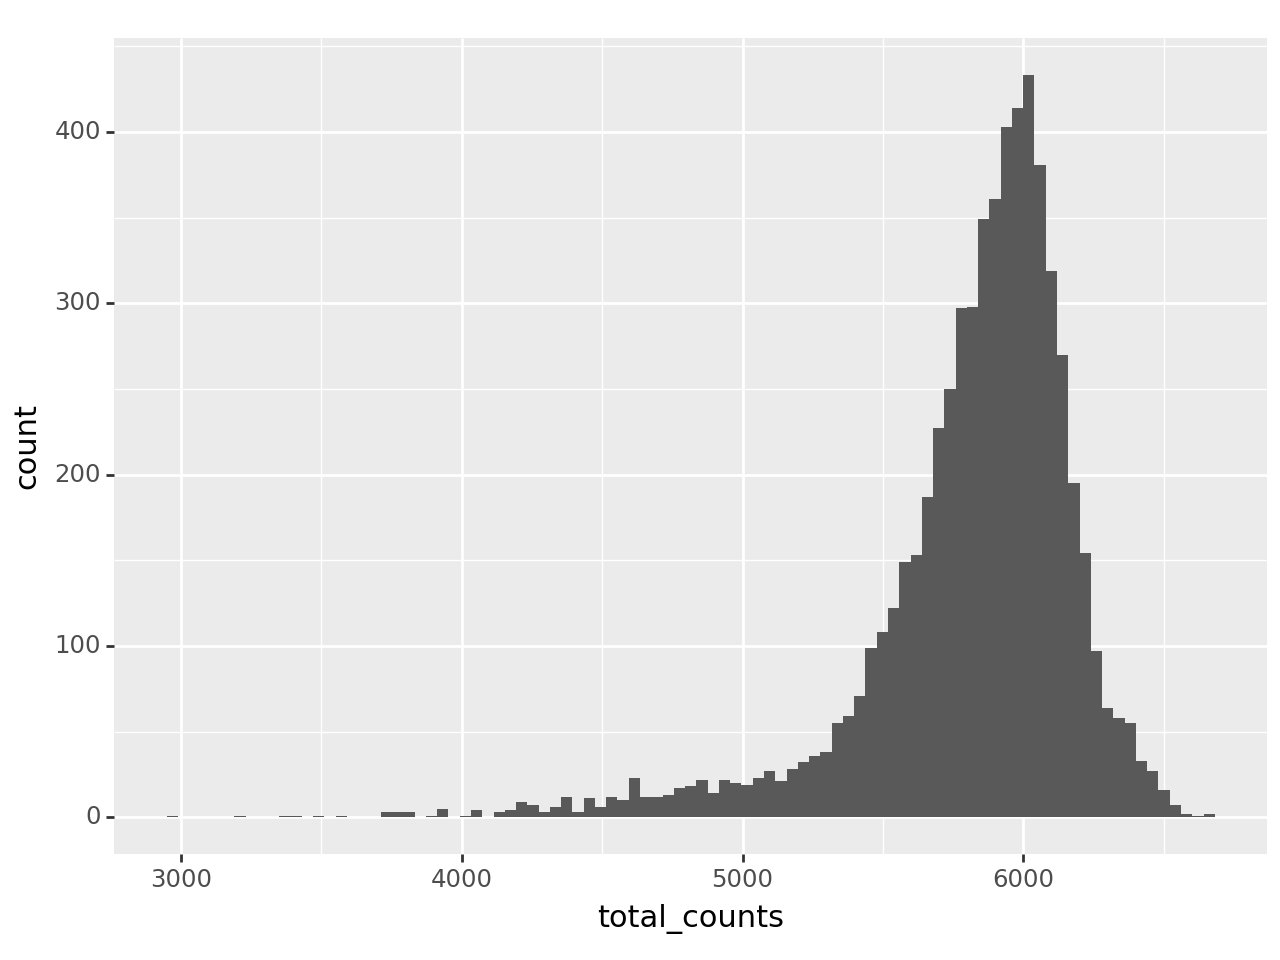

In [ ]:
#Total counts per cell
p = (
    pn.ggplot(adata.obs,pn.aes(x='total_counts'))
    + pn.geom_histogram()
)
p.draw()

c:\Users\james\mambaforge\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 52'. Pick better value with 'binwidth'.


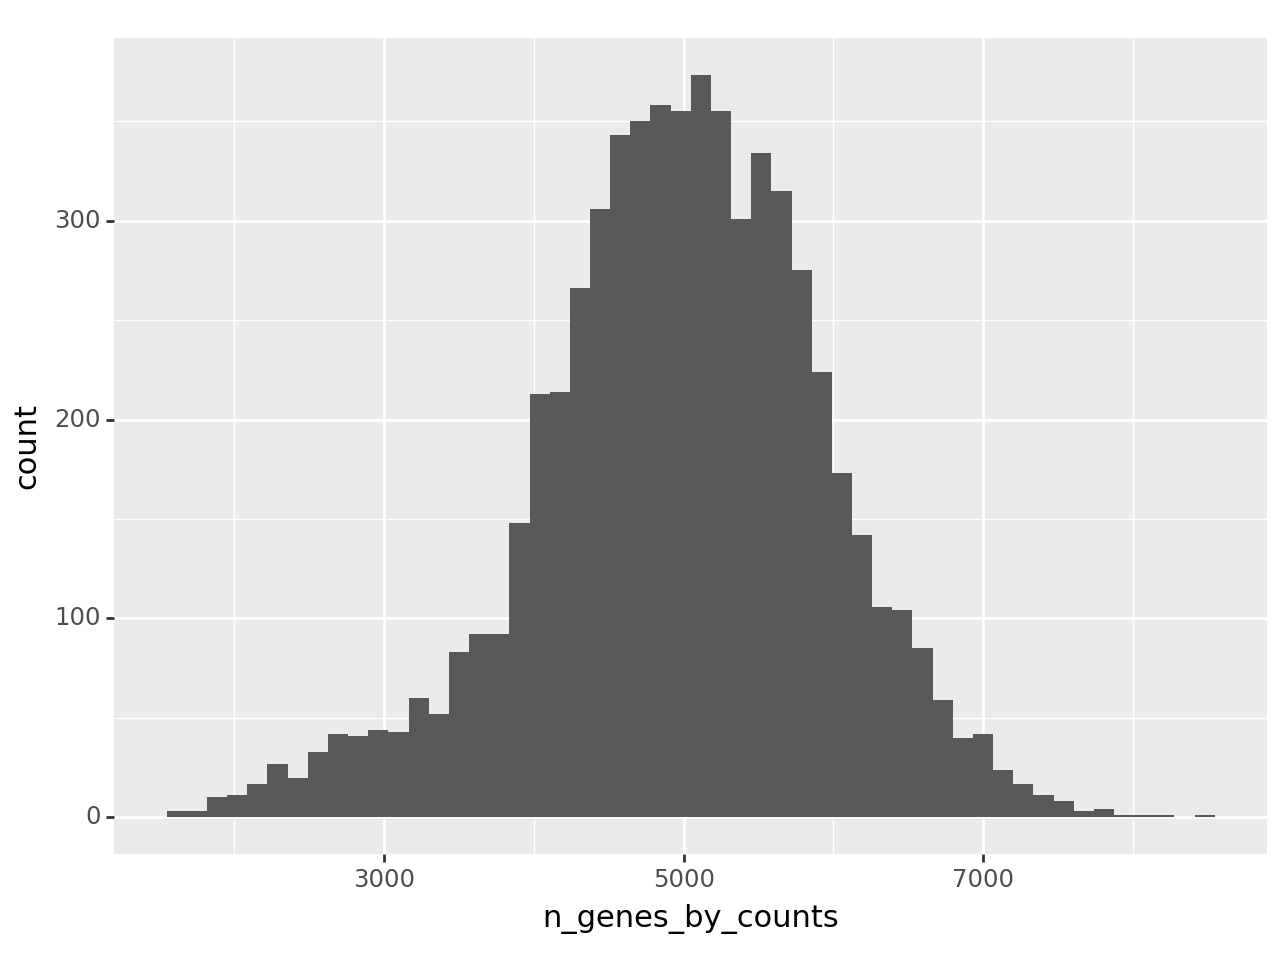

In [ ]:
#Number of genes per cell
p = (
    pn.ggplot(adata.obs,pn.aes(x='n_genes_by_counts'))
    + pn.geom_histogram()
)
p.draw()

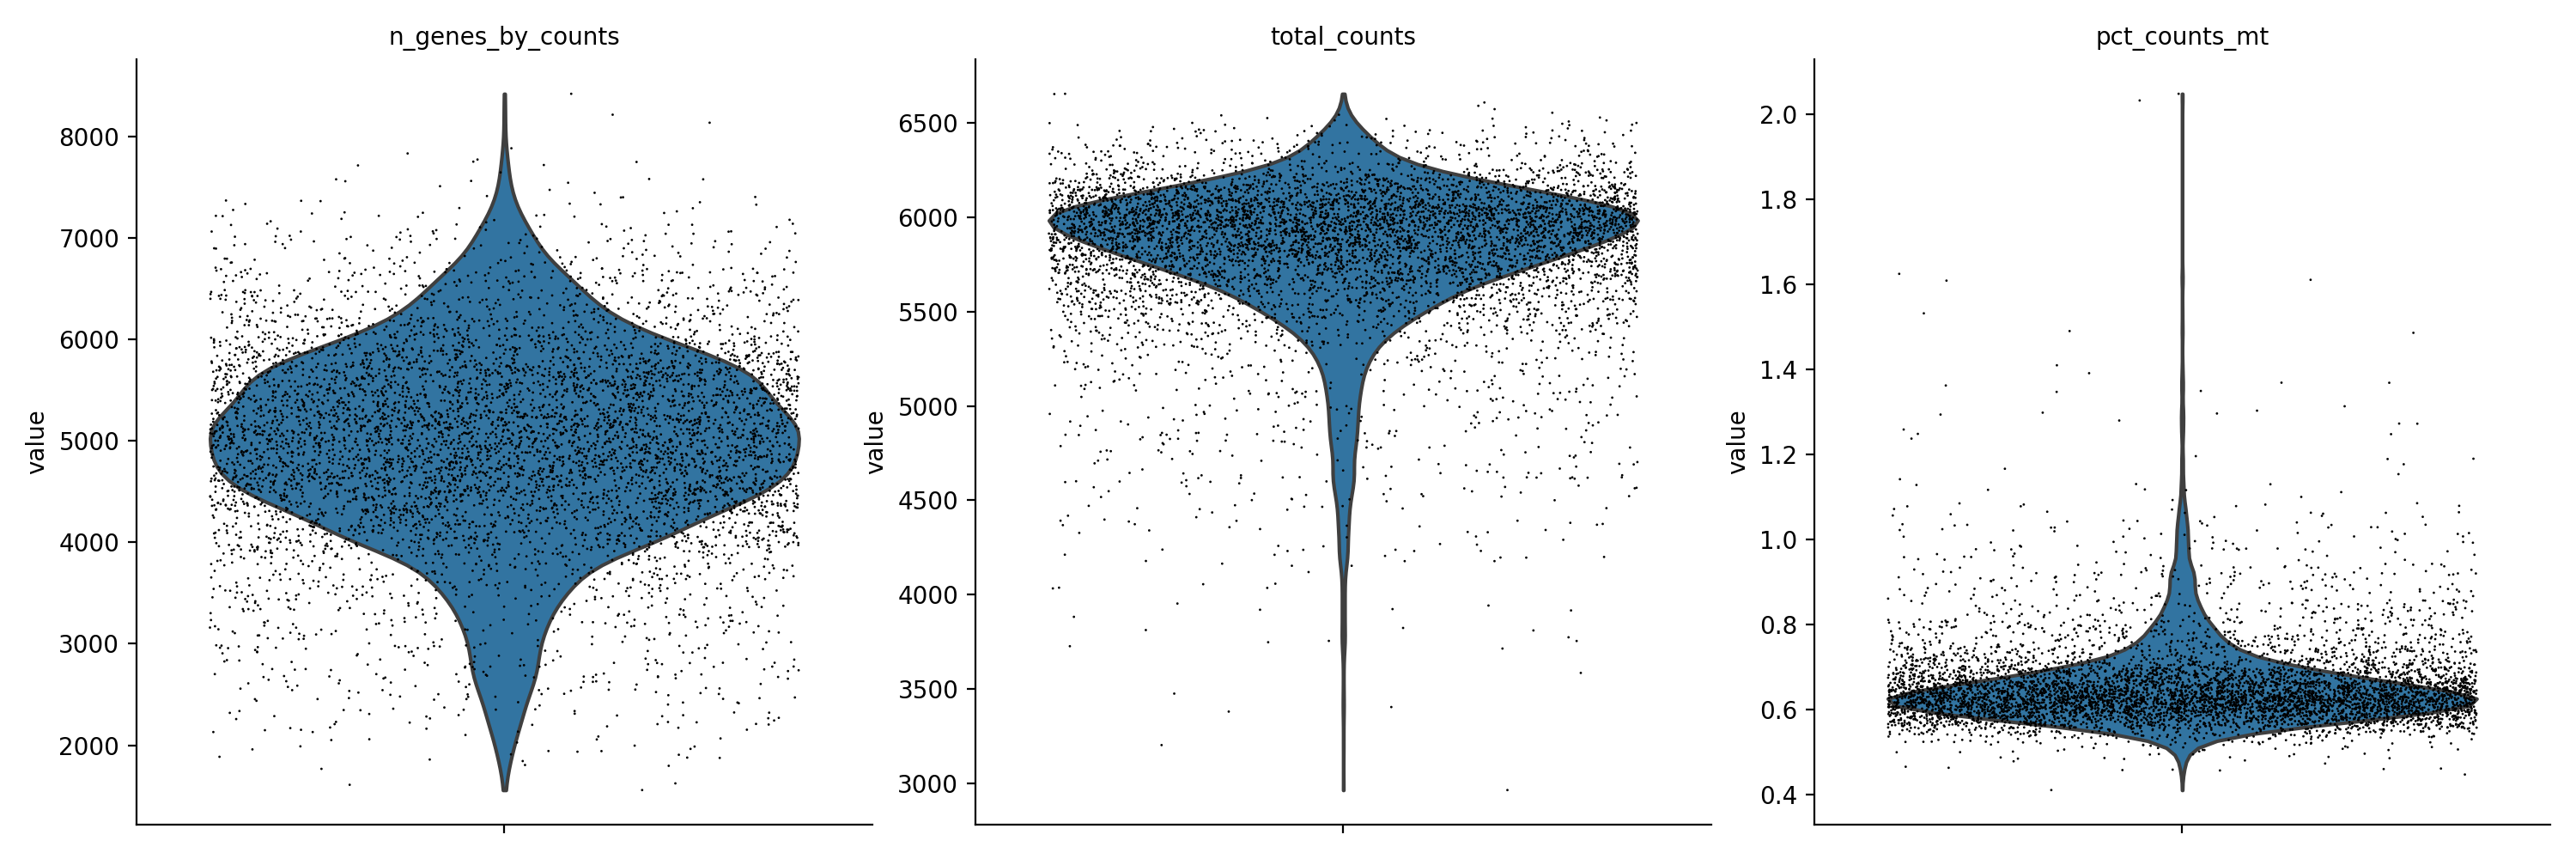

In [ ]:
#QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

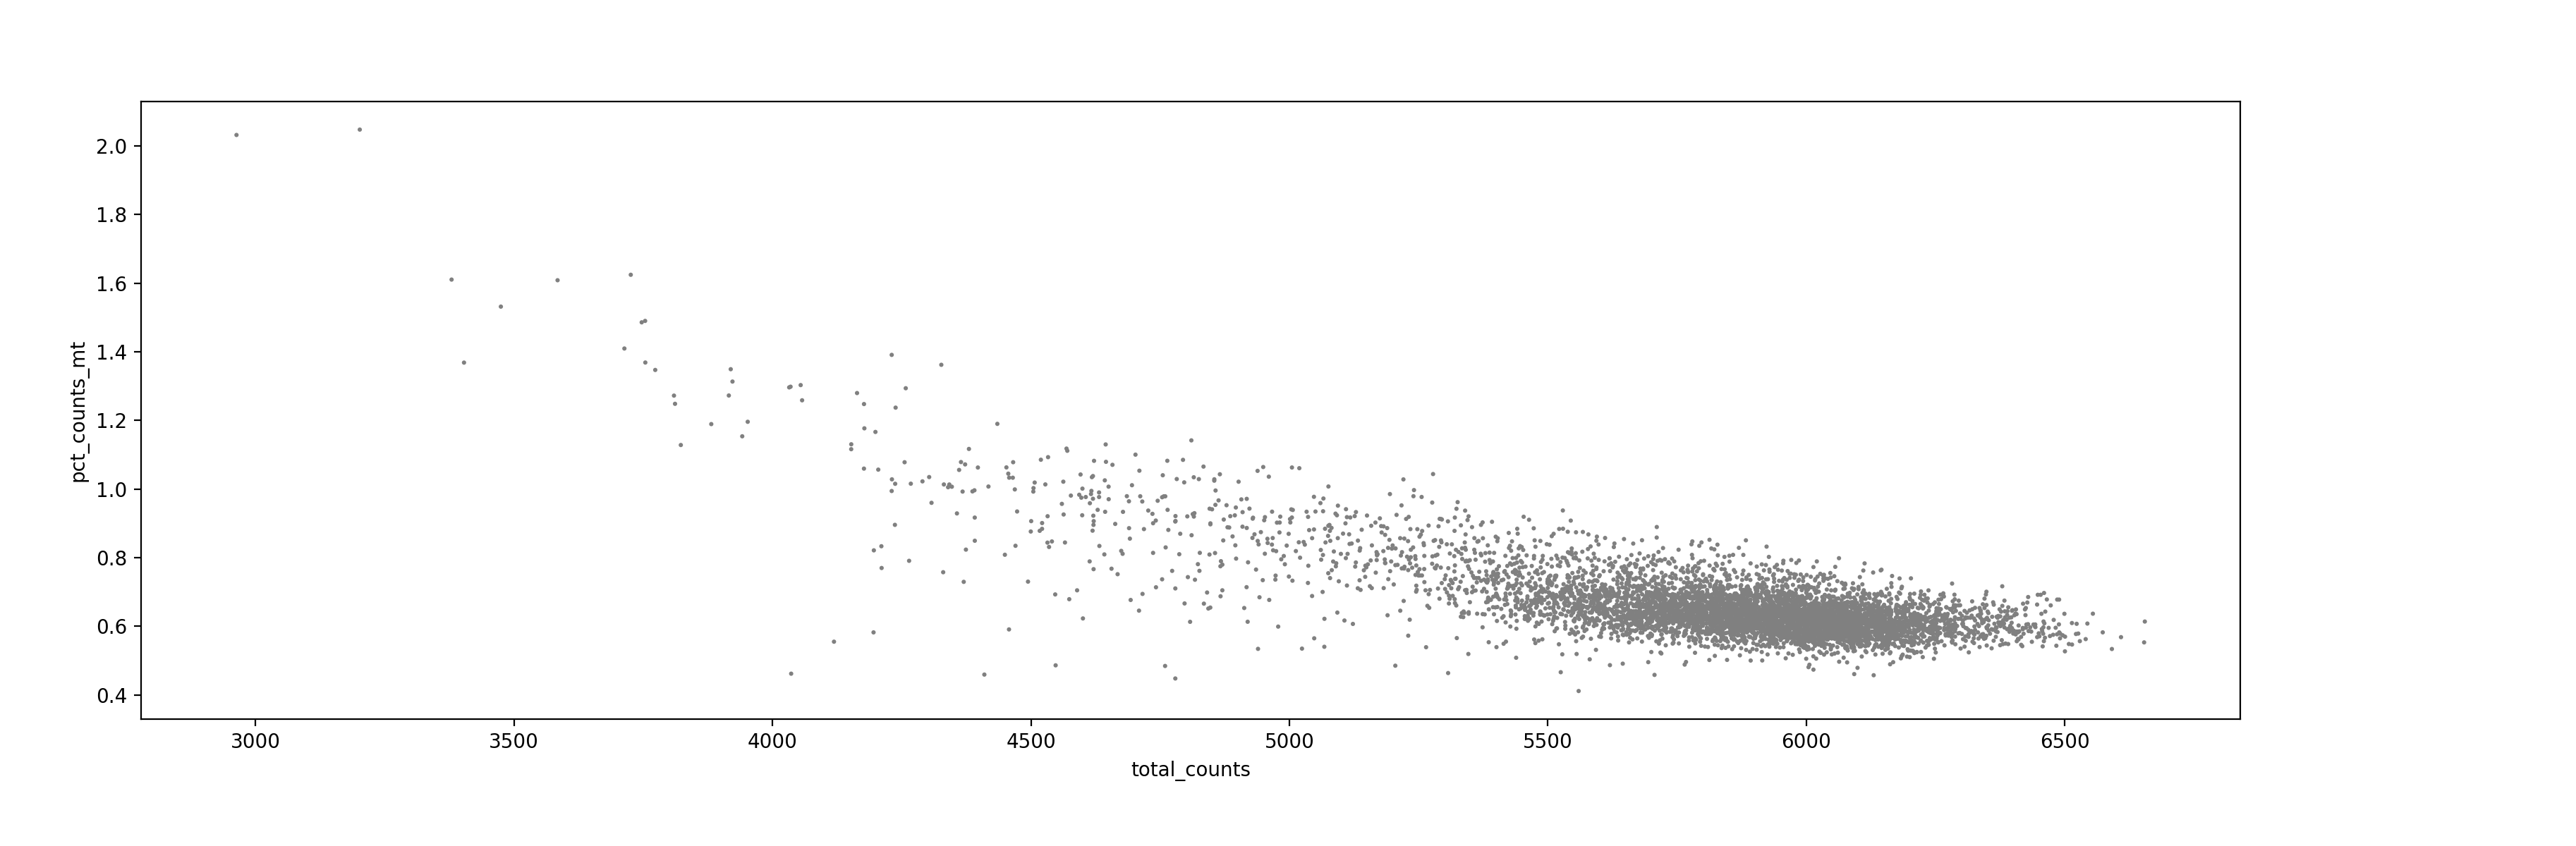

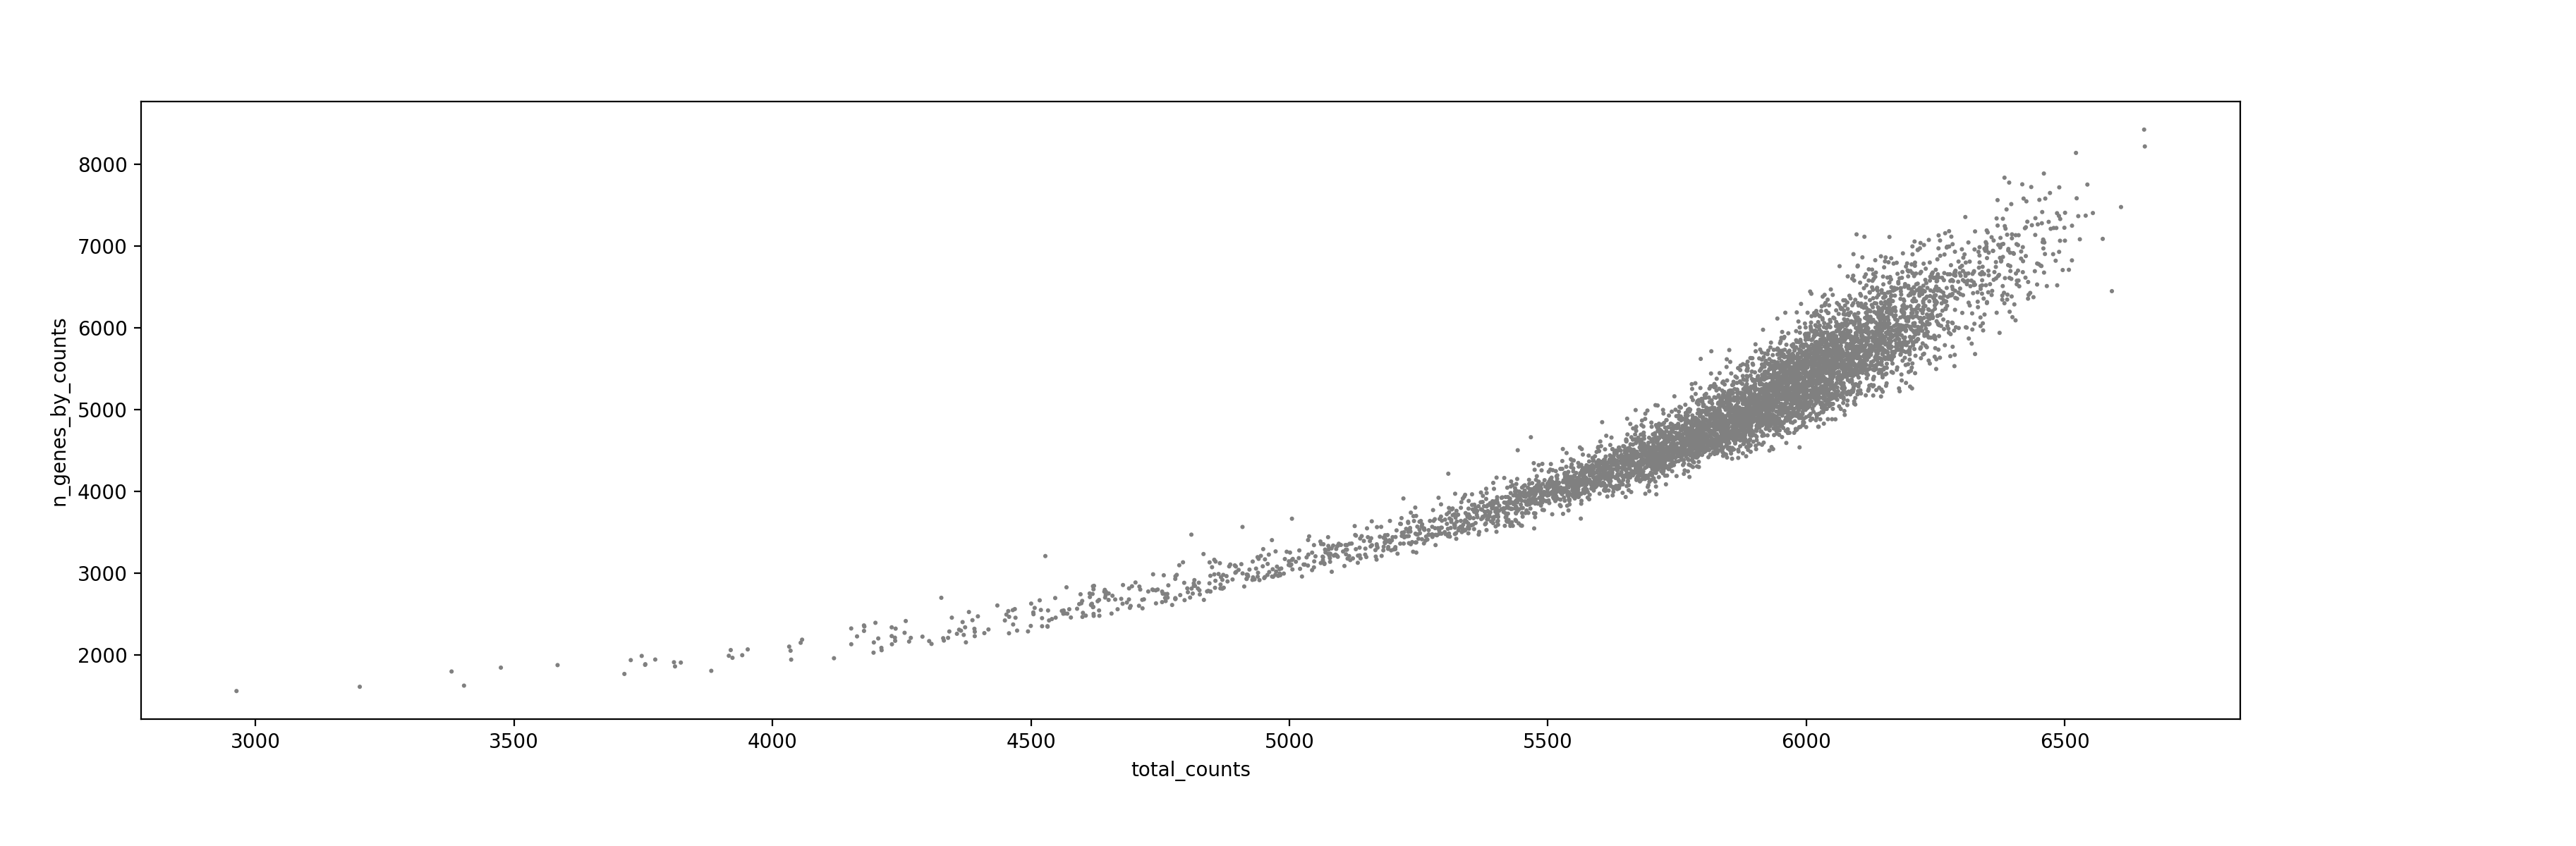

In [ ]:
#Relationship of total counts with percent counts of mitochondrial genes and number of genes by counts
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
#Removal of low quality cells
adata = adata[adata.obs.pct_counts_mt < 20, :] #Removal of cells with % counts from mt genes greater than 20% 
adata = adata[adata.obs.n_genes_by_counts > 500, :] #removal of cells with number of genes less than 500

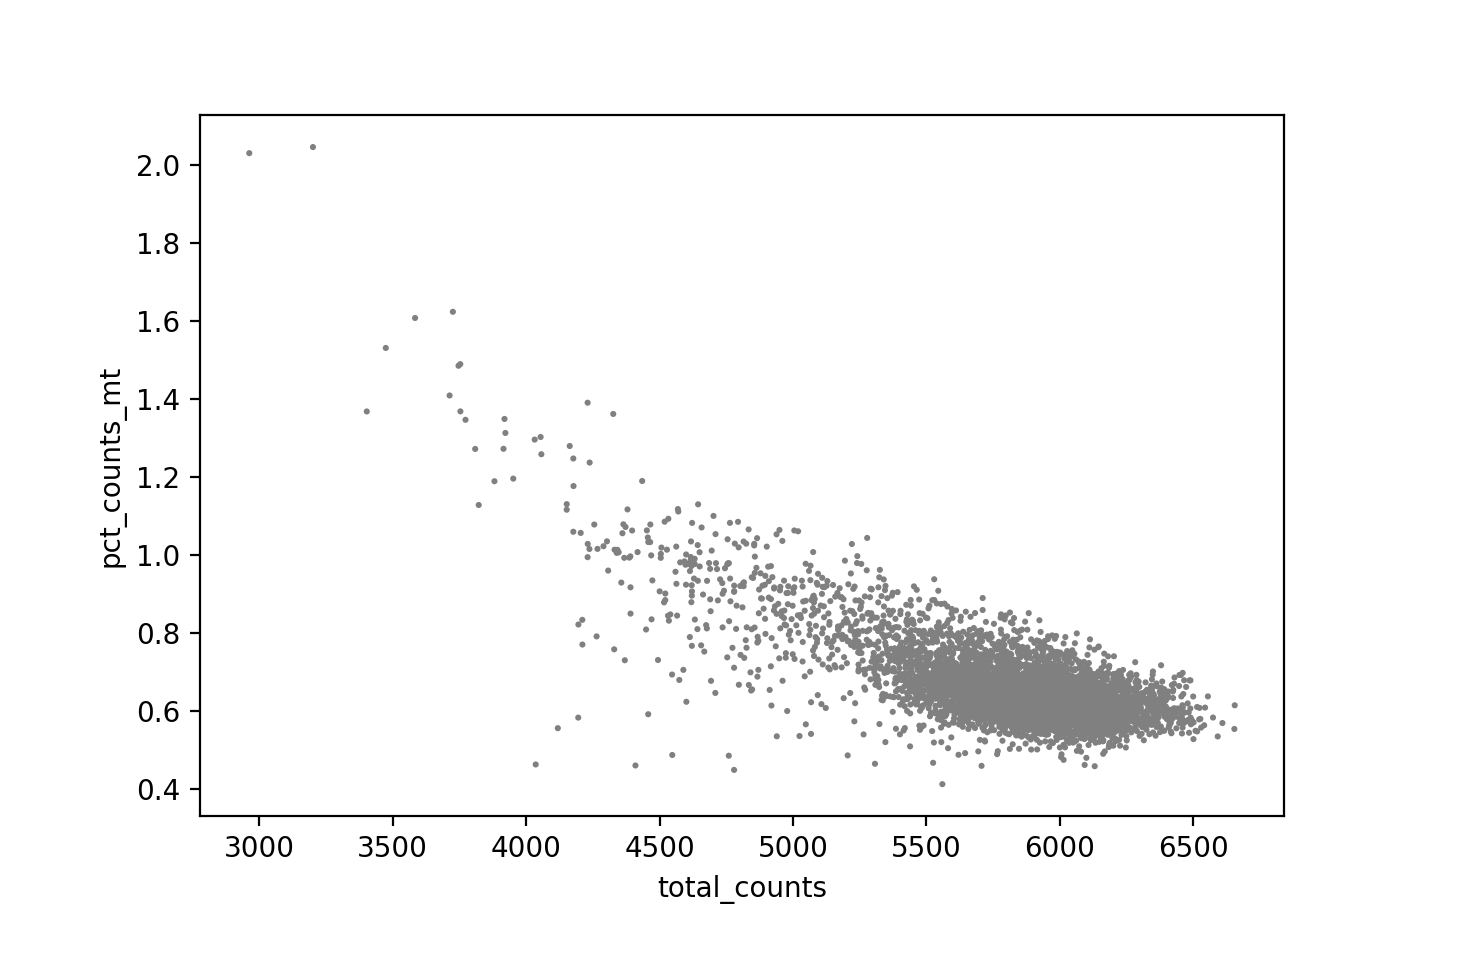

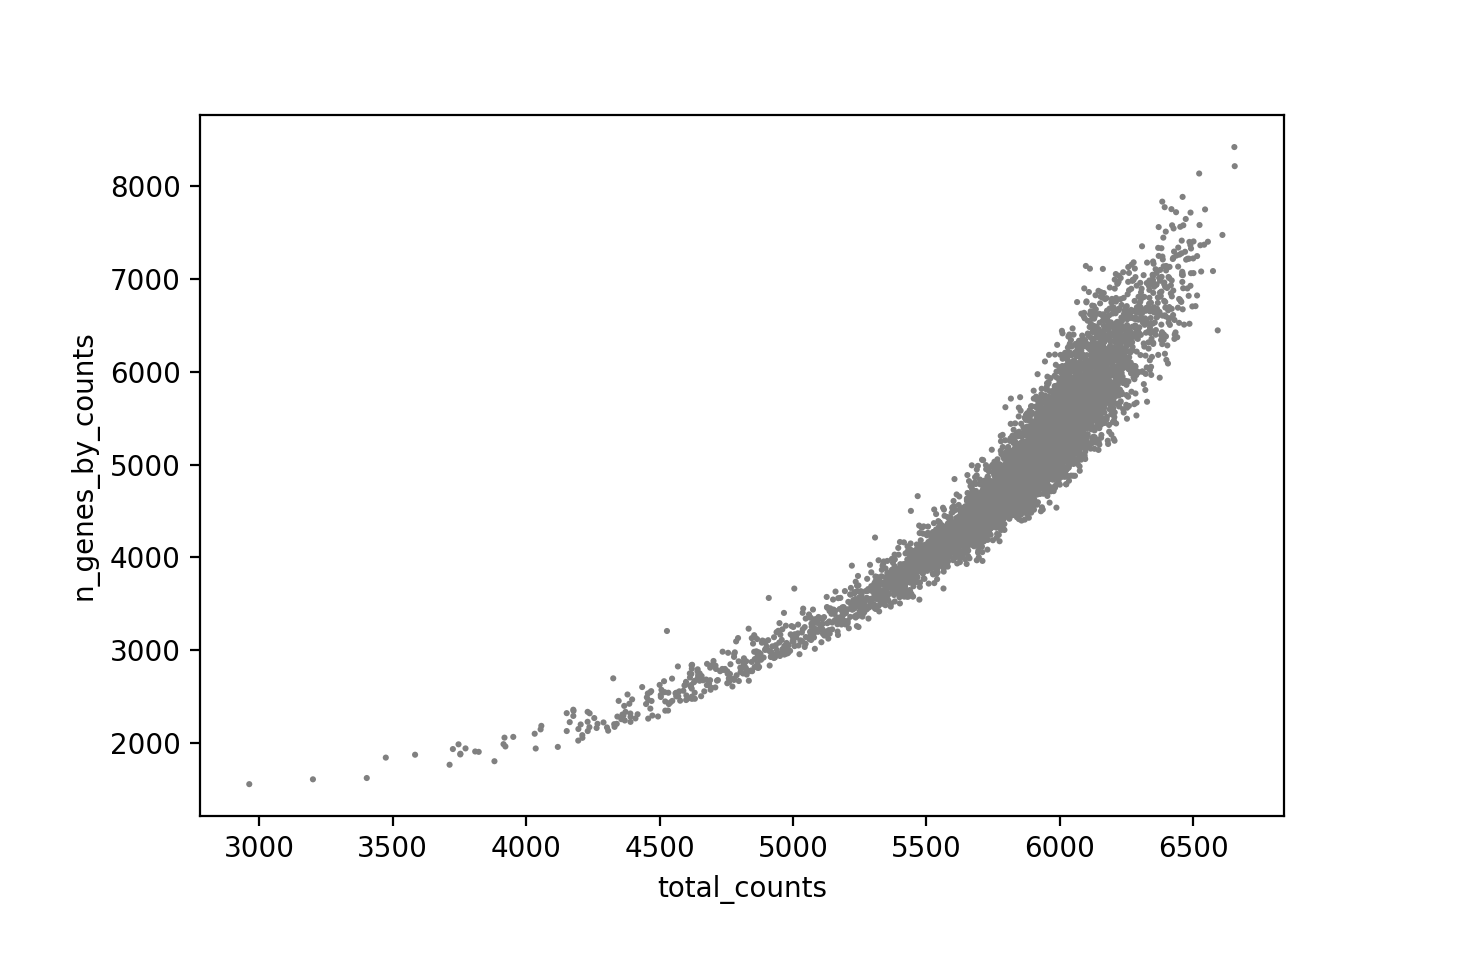

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
#Normalize the data matrix
sc.pp.normalize_total(adata, target_sum=1e6)

c:\Users\james\mambaforge\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.


In [ ]:
# Log transform
sc.pp.log1p(adata)

In [ ]:
#Select highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.25)

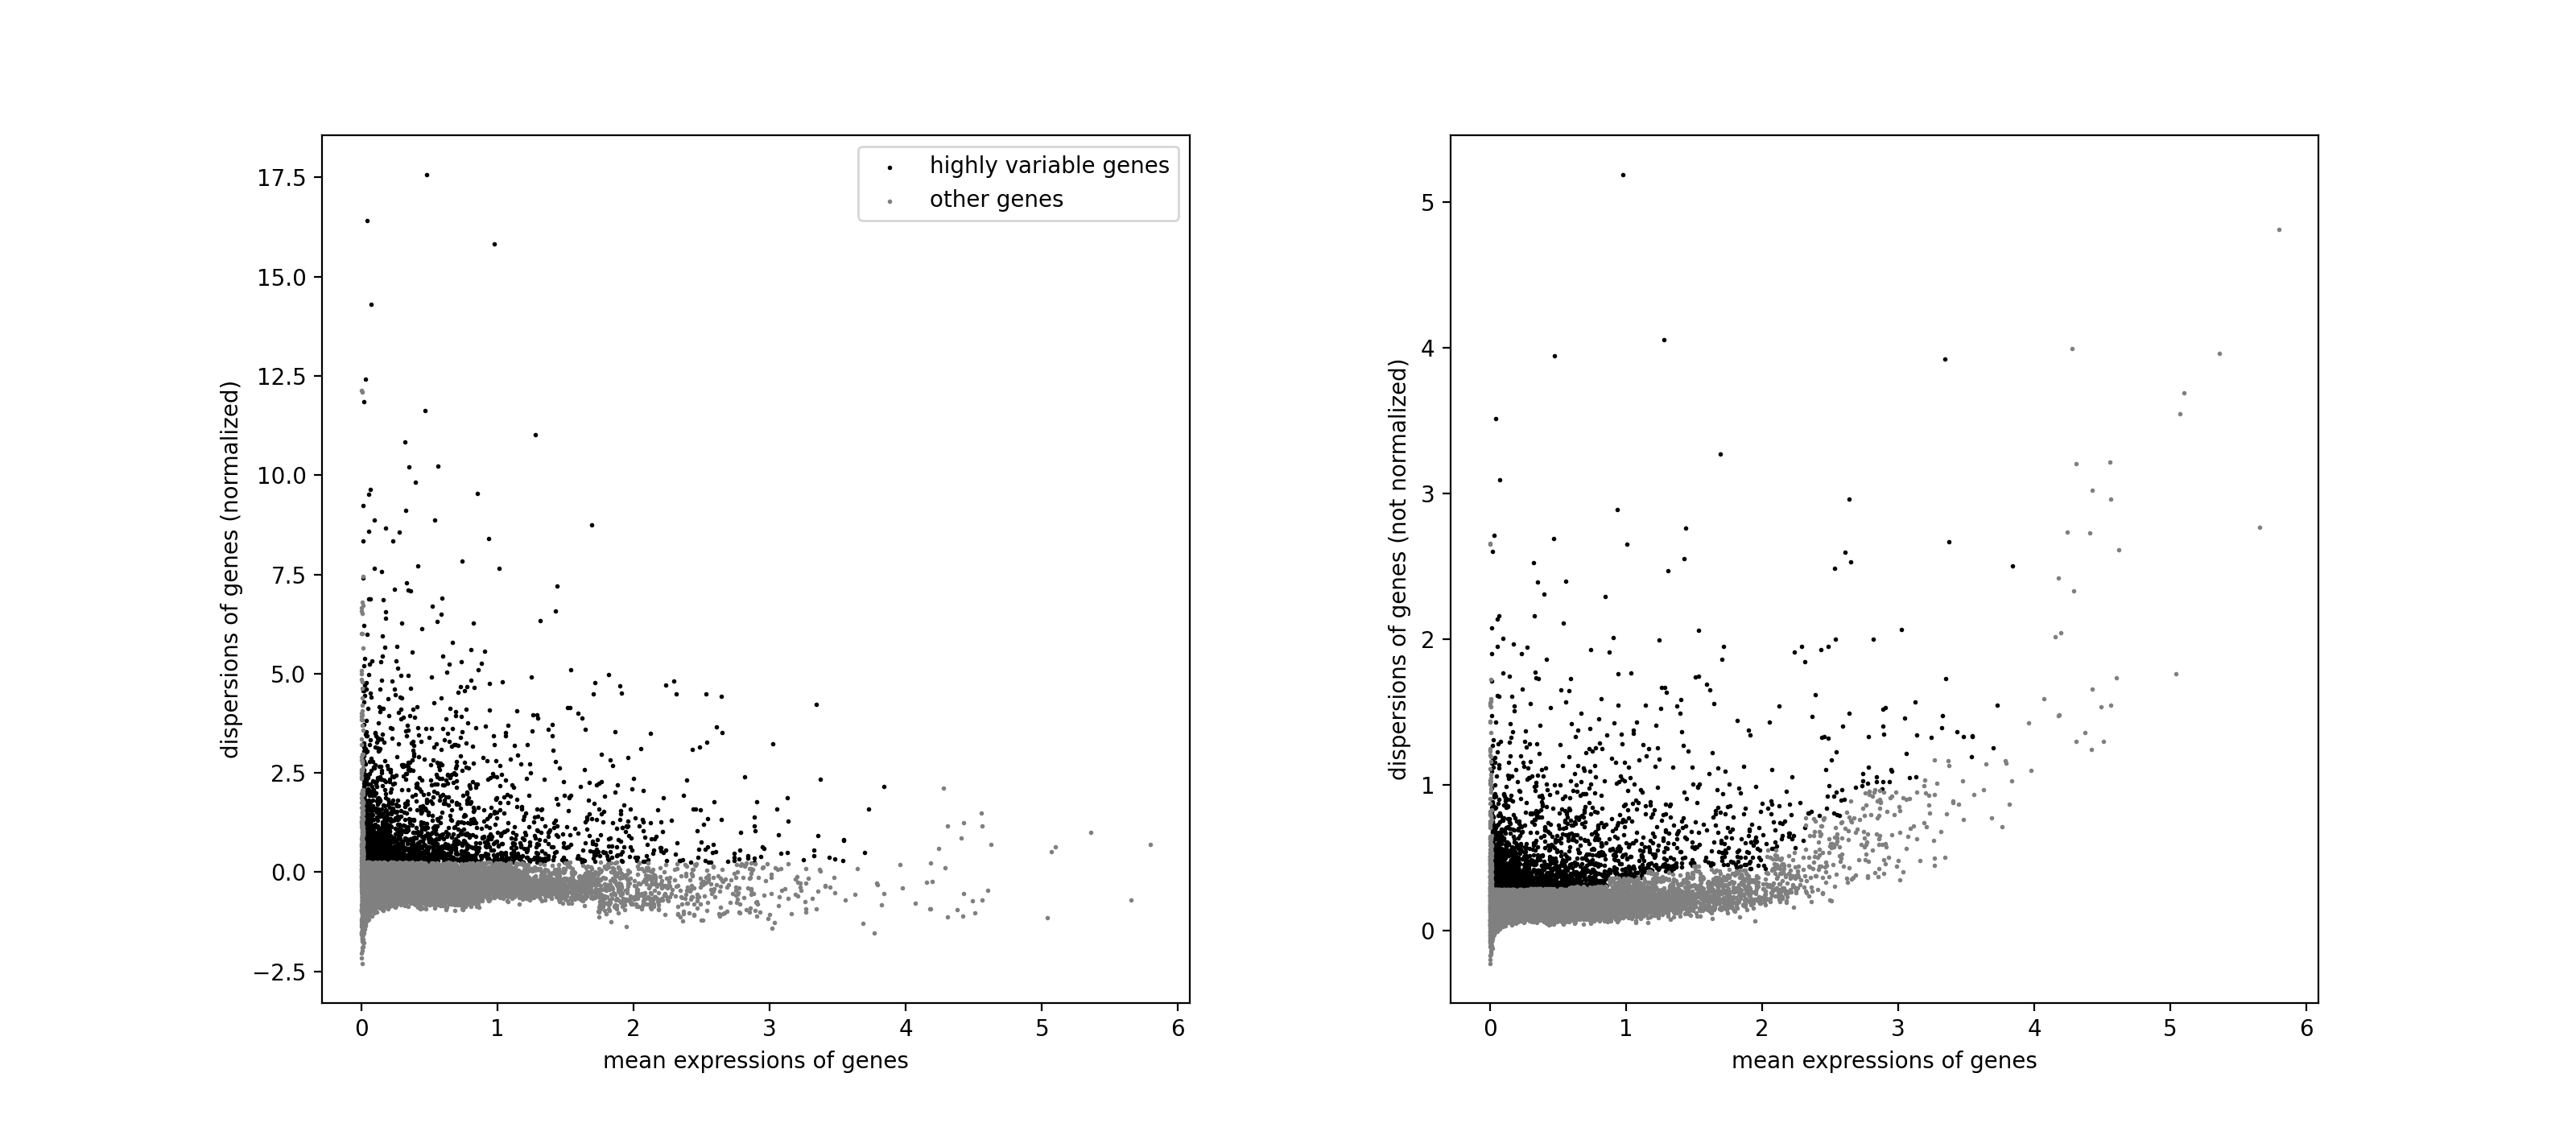

In [ ]:
sc.pl.highly_variable_genes(adata,)

In [ ]:
#Save raw values as .raw before replacing the values with highly variable genes
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
adata.write("F:/Lab/trakthenberg/trak_final_scanpy.h5ad")

In [ ]:
#Regress
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
#Scale the data
sc.pp.scale(adata, max_value=10)

In [4]:
#Perform PCA to reduce dimensionality of the data
sc.tl.pca(adata, svd_solver='arpack')

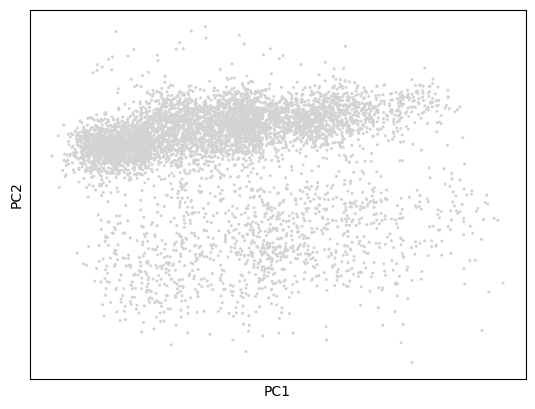

In [5]:
sc.pl.pca(adata)

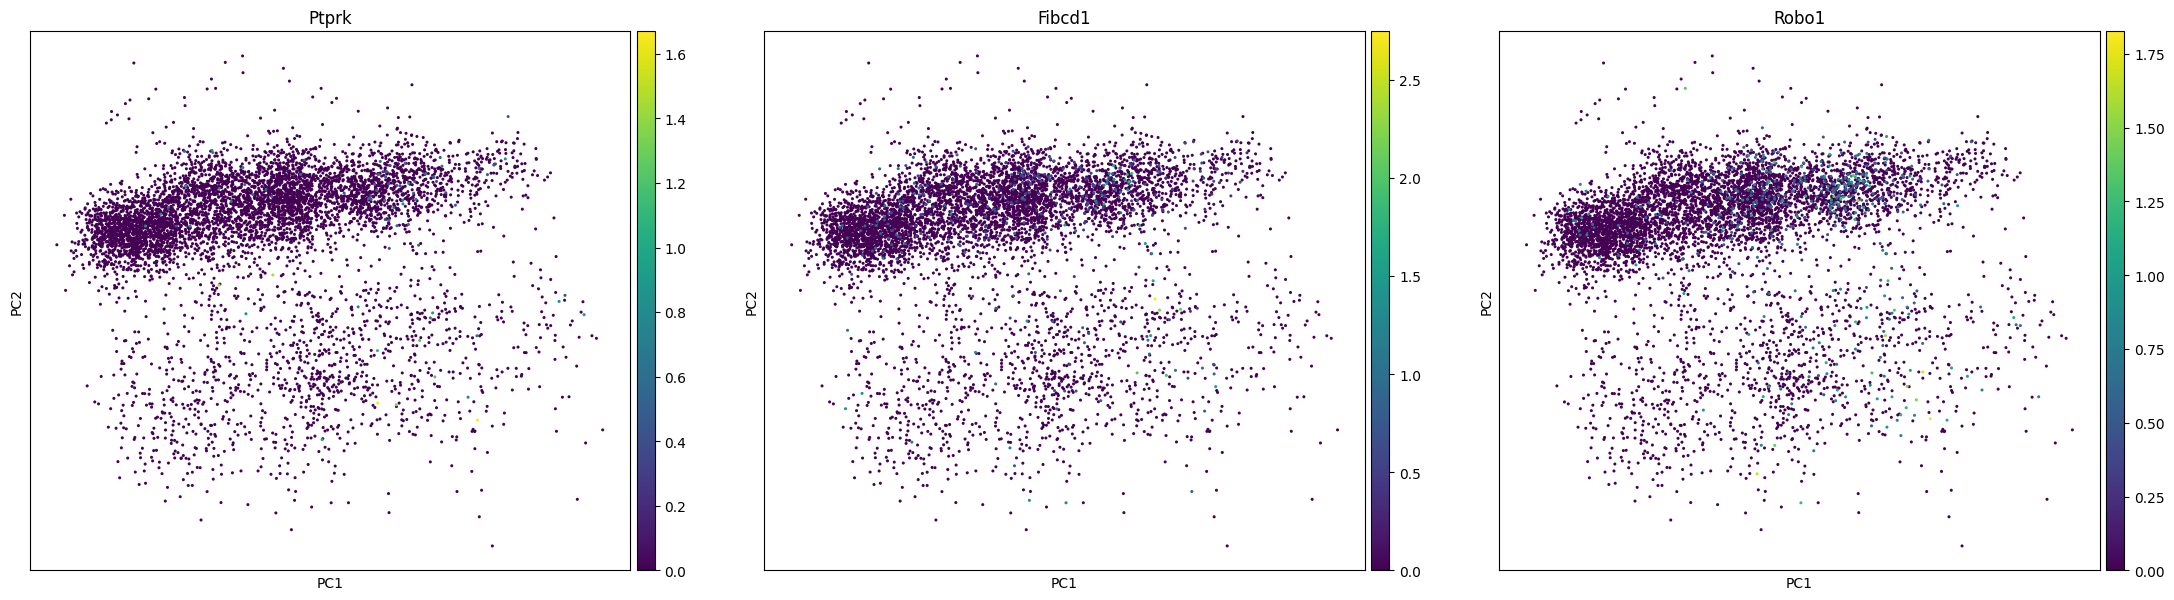

In [6]:
FIGSIZE=(8,7)
rcParams['figure.figsize']=FIGSIZE
sc.pl.pca(adata,color=['Ptprk','Fibcd1','Robo1'])

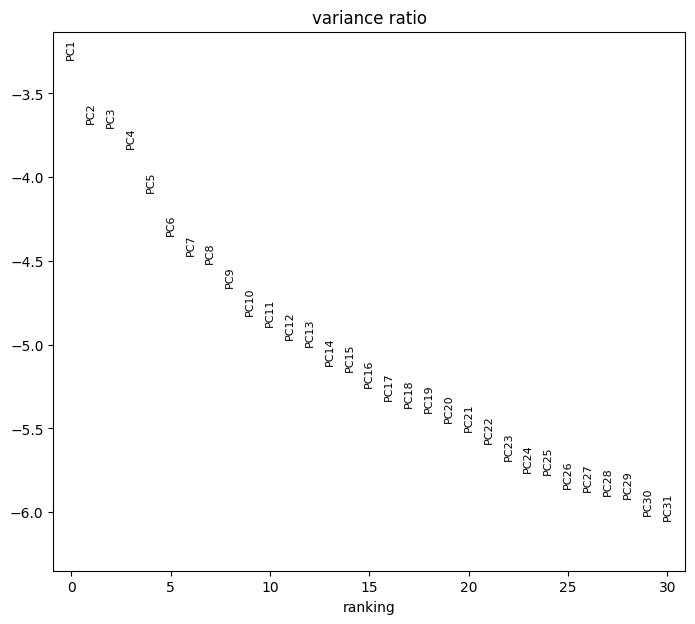

In [8]:
sc.pl.pca_variance_ratio(adata, log=True)

In [9]:
#Compute the neighborhood graph to begin clustering
#sc.pp.neighbors(adata, n_neighbors=5, n_pcs=40)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [ ]:
adata.uns['neighbors']

{'connectivities_key': 'connectivities',
 'distances_key': 'distances',
 'params': {'n_neighbors': 10,
  'method': 'umap',
  'random_state': 0,
  'metric': 'euclidean',
  'n_pcs': 40}}

In [ ]:
#Cluster cells via leiden
#sc.tl.leiden(adata, resolution=0.95)
sc.tl.leiden(adata, resolution=0.3)

In [ ]:
sc.tl.paga(adata)
sc.pl.paga(adata,plot=False)

In [ ]:
#plot umap based on clustering/neighborhood graph from above
sc.tl.umap(adata, init_pos='paga')

In [ ]:
adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_scanpy.h5ad")

In [ ]:
subc = adata.obs

In [ ]:
#Assigning cluster:
subc['Assigned Cluster'] = subc['leiden']
clus = {"0":"42","1":"43","2":"44"}
subc['Assigned Cluster'] = subc['Assigned Cluster'].replace(clus)

In [ ]:
adata.obs['Assigned Cluster'] = adata.obs['Assigned Cluster'].astype('str')

In [ ]:
#adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_subclustered32_scanpy.h5ad")
#adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_AOSsubset_scanpy.h5ad")

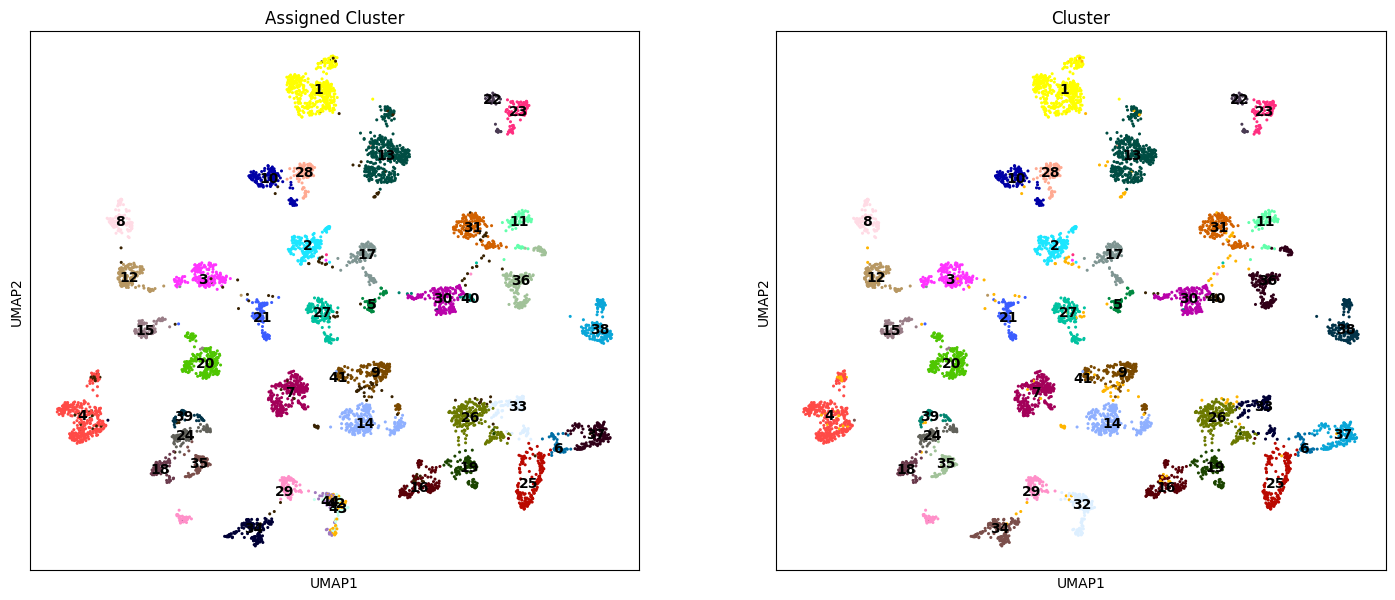

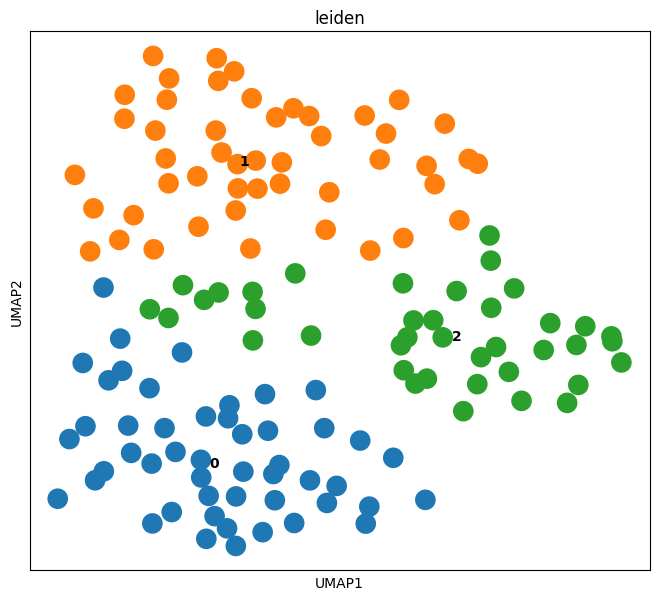

In [22]:
#plot with leiden clusters, annotated age, direction, and monocle clustering from the paper
#Leiden clusters seem to identify up vs down, as well as young vs old cells for both/ save='trak_leiden_final.svg'
adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_subclustered32_scanpy.h5ad")
bdata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_AOSsubset_scanpy.h5ad")

FIGSIZE=(8,7)
rcParams['figure.figsize']=FIGSIZE
#sc.pl.umap(adata,color=['leiden','Cluster'], add_outline=True)
sc.pl.umap(adata,color=['Assigned Cluster','Cluster'], add_outline=False,legend_loc='on data')
sc.pl.umap(bdata,color=['leiden'], add_outline=False,legend_loc='on data')

In [18]:
adata.obs['group'] = 'rest_of_clusters'
adata.obs.loc[adata.obs['Cluster'] == 32, 'group'] = 'target_cluster'

In [19]:
adata.obs[adata.obs['group']=='target_cluster']

Cluster  Eye  n_genes_by_counts  total_counts  \
Cell                                                               
AAACGGGGTGTTCTTT.2      32    2               5072   6092.741546   
AAAGATGAGGAGTCTG.2      32    2               6371   6136.451154   
AACCGCGTCTGTCTCG.2      32    2               6105   6197.598083   
AACTCCCAGCGTGAAC.2      32    2               6495   6164.712744   
AACTGGTCATTGGGCC.2      32    2               3096   4786.931383   
...                    ...  ...                ...           ...   
TTCTCCTAGATATGGT.2      32    2               6413   6104.430157   
TTCTCCTTCCGAACGC.1      32    1               6268   6272.420652   
TTGGCAACAGCTGTGC.2      32    2               5244   6145.465000   
TTTACTGGTCCGAGTC.2      32    2               6125   6099.548142   
TTTGCGCTCCGTTGTC.1      32    1               5911   6146.940572   

                    total_counts_mt  pct_counts_mt leiden Assigned Cluster  \
Cell                                                                         
AAACGGGGTGTTCTTT.2        28.080765       0.460889     21               43   
AAAGATGAGGAGTCTG.2        41.321611       0.673380     21               43   
AACCGCGTCTGTCTCG.2        36.073549       0.582057     21               44   
AACTCCCAGCGTGAAC.2        39.533497       0.641287     21               43   
AACTGGTCATTGGGCC.2        38.779186       0.810105     21               43   
...                             ...            ...    ...              ...   
TTCTCCTAGATATGGT.2        40.360112       0.661161     21               43   
TTCTCCTTCCGAACGC.1        39.535168       0.630302     21               42   
TTGGCAACAGCTGTGC.2        47.010226       0.764958     21               43   
TTTACTGGTCCGAGTC.2        37.467039       0.614259     21               42   
TTTGCGCTCCGTTGTC.1        40.232460       0.654512     21               43   

                             group  
Cell                                
AAACGGGGTGTTCTTT.2  target_cluster  
AAAGATGAGGAGTCTG.2  target_cluster  
AACCGCGTCTGTCTCG.2  target_cluster  
AACTCCCAGCGTGAAC.2  target_cluster  
AACTGGTCATTGGGCC.2  target_cluster  
...                            ...  
TTCTCCTAGATATGGT.2  target_cluster  
TTCTCCTTCCGAACGC.1  target_cluster  
TTGGCAACAGCTGTGC.2  target_cluster  
TTTACTGGTCCGAGTC.2  target_cluster  
TTTGCGCTCCGTTGTC.1  target_cluster  

[133 rows x 9 columns]

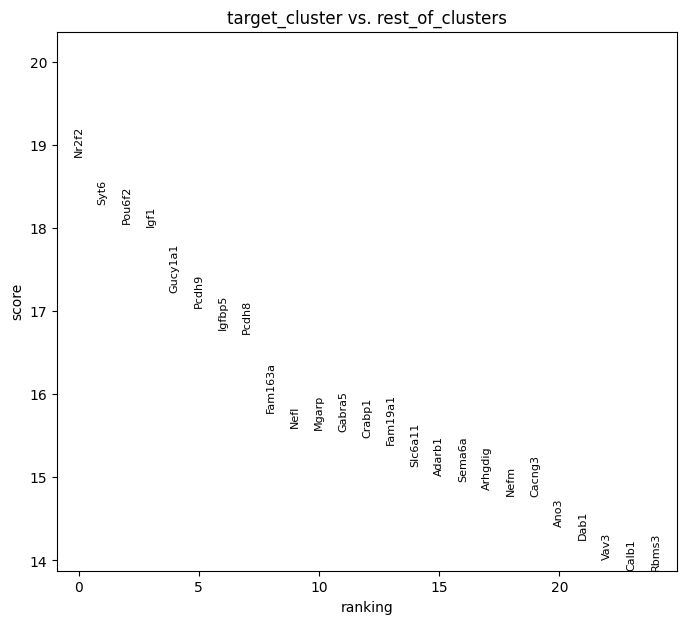

In [21]:
#Find differential genes with Wilcoxon test

#FIGSIZE=(10,7)
#rcParams['figure.figsize']=FIGSIZE

sc.tl.rank_genes_groups(adata, groupby='group',reference='rest_of_clusters', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [23]:
d = adata.uns['rank_genes_groups']
vol = pd.DataFrame()
namelist = d['names'].tolist
namelist

<function ndarray.tolist>

In [24]:
#DEG rankings
ranked_genes_by_cluster = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
ranked_genes_by_cluster.head(10)

0       1        2       3        4          5              6  \
0    Calb2  Tagln3    Foxp2    Igf1    Foxp1    Gm17750        Neurod2   
1   Rbpms2   Cpne4    Anxa2   Mast4    Cpne4      Cplx2         Pou4f3   
2     Syt4   Cd24a    Tusc5   Pcdh9     Lmo4      Cpne4           Irx6   
3    Stmn1   Calb2    Nell2    Rgs4    Tshz2       Tac1         Crtac1   
4   Tmsb10   Apbb2  Ubash3b   Eomes     Rprm      Calb2           Ebf1   
5     Tpm1    Ebf1    Pcdh7   Synpr    Calb2       Ebf3         Lgals7   
6   Malat1    Irx3     Irx4  Cacng3  Tcerg1l       Six3         Tfap2d   
7    Celf4    Snca     Raly    Irx1    Foxp2       Sox4         Rgs7bp   
8    H3f3b   Lypd1     Rora  Necab2  Runx1t1  Serpinb1b        Neurod1   
9  Runx1t1    Six3    Kcnd2  Pou6f2   Vstm2l      Sparc  A930017K11Rik   

         7        8       9  ...      32      33        34       35      36  \
0    Meis2     Ebf1    Rprm  ...    Igf1   Pcdh7     Satb1   Pcdh10    Mafb   
1  Neurod2    Cpne4  Pcdh10  ...   Pcdh9    Six3    Tfap2d     Rprm    Npnt   
2    Prdm8     Rprm    Rgs4  ...   Mast4     Jun  Syndig1l     Irx6   Pcdh7   
3     Ebf3    Meis2    Jam2  ...    Ank2    Kitl      Dkk3     Isl1  Ogfrl1   
4    Tshz2   Barhl2    Irx6  ...    Psap   Cplx2    Pou4f3      Cpe    Rgs4   
5   Pou4f2    Tshz2    Sncg  ...   Synpr    Mafb    Pcdh17    Alcam  Camk2d   
6   Lgals7    Calb2    Isl1  ...  Atp1b1    Isl2    Phlda1   Camk2d  Kcnip4   
7     Nfib    Cd24a    Evc2  ...  mt-Co1  Atp2b1  Trp53i11   Pou4f2   Cplx2   
8   Pou4f3  Gm17750    Tbr1  ...  Mgat4c   Apbb2     Calb2  Slc17a6   Fgf12   
9      Ckb     Isl2  Pou4f2  ...   Lrp1b  Atp1b1    Anp32a     Dlg2  Chrna6   

        37       38       39        40      41  
0     Ebf1   Malat1    Tusc5     Crim1    Rgs4  
1   Malat1     Syt4    Nell2       Ntm    Pcp4  
2    Cpne4    Calb2    Foxp2    Pcdh17   Alcam  
3  mt-Atp6   Dpysl3     Reln  Trp53i11   Pcdh9  
4  mt-Cytb    Map1b    Pcdh7    Tfap2d   Pcdh8  
5    Calb2     Mstn     Rora  Syndig1l   Pcdh7  
6   mt-Co3   mt-Co3  Ubash3b      Reln   Zfhx3  
7   mt-Co2    Islr2    Cdk14    Sema3a   Camk4  
8   mt-Nd4    Ncam1    Aplp2      Syt4  Atp1b1  
9    Cd24a  Runx1t1    Cadm1    Mgat4c   Cadm2  

[10 rows x 42 columns]

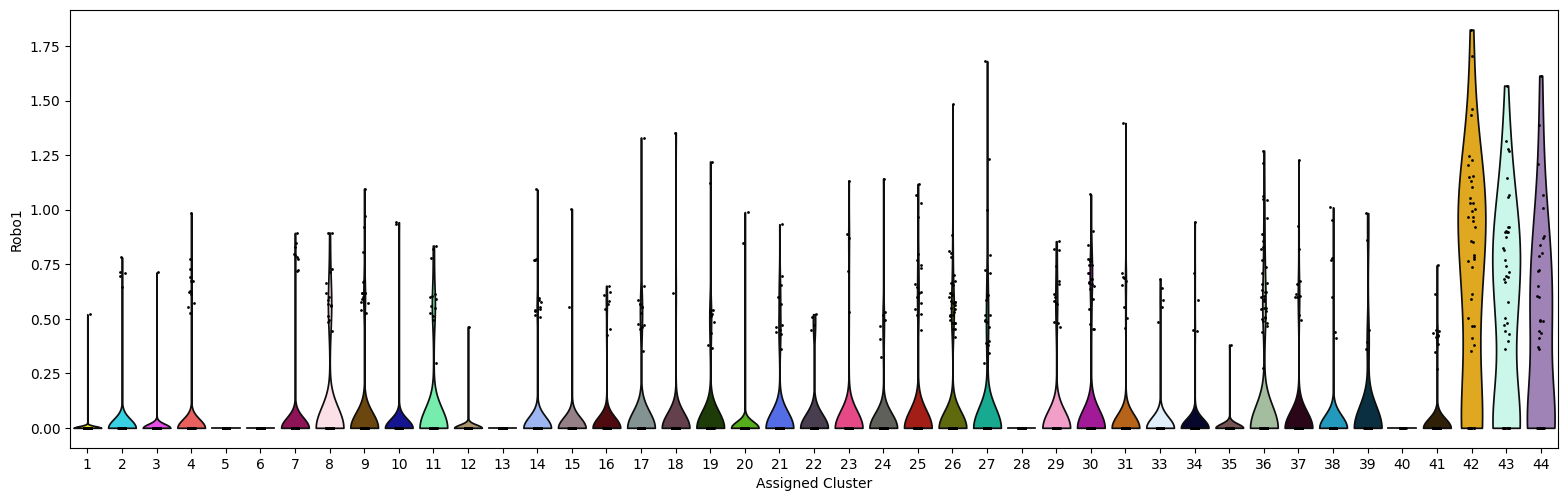

In [27]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

FIGSIZE=(15,6)
rcParams['figure.figsize']=FIGSIZE

sc.pl.violin(adata, ['Robo1'], groupby='Assigned Cluster', size=2)

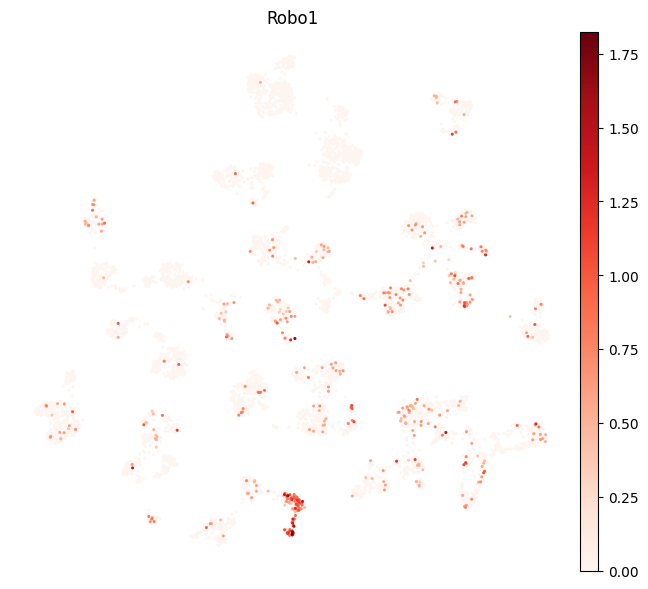

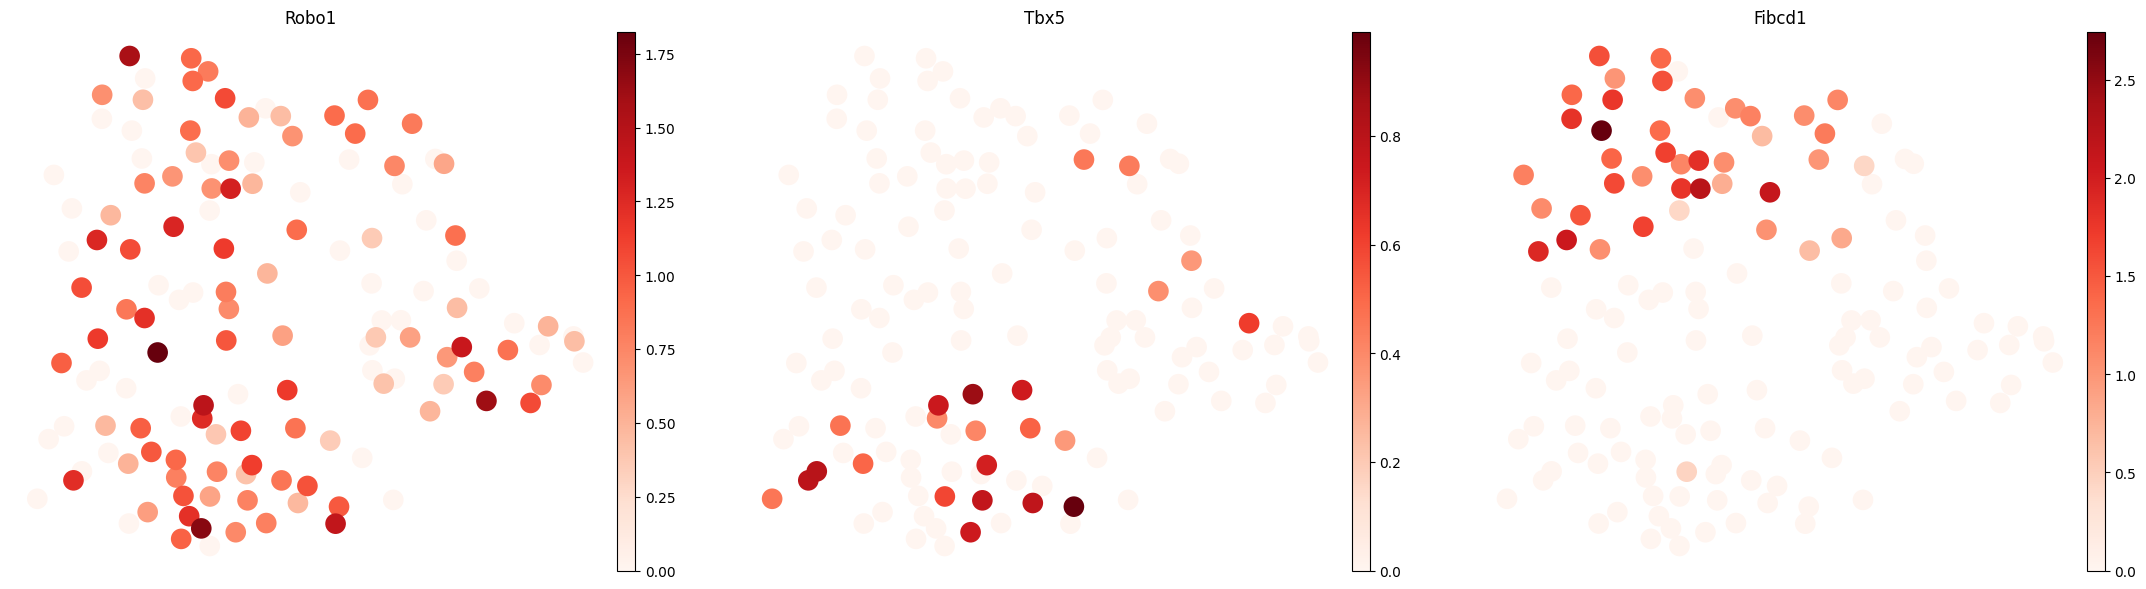

In [28]:
FIGSIZE=(8,7)
rcParams['figure.figsize']=FIGSIZE

direction_map = {"0":"Superior oDSGC", "1": 'Inferior oDSGC', "2": 'Putative Forward oDSGC'}
bdata.obs['Direction'] = bdata.obs['leiden'].map(direction_map)
sc.pl.umap(adata,color=['Robo1'],cmap='Reds', frameon=False)
sc.pl.umap(bdata,color=['Robo1','Tbx5','Fibcd1'],cmap='Reds', frameon=False)

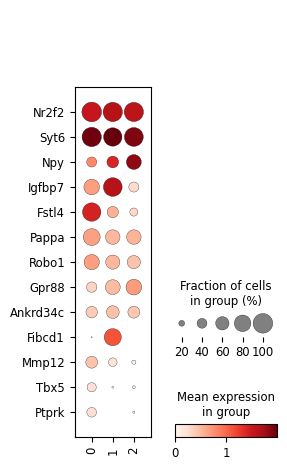

In [30]:
marker_genes = ['Nr2f2','Syt6','Npy','Igfbp7','Fstl4','Pappa','Robo1','Gpr88','Ankrd34c','Fibcd1','Mmp12','Tbx5','Ptprk']
sc.pl.dotplot(bdata, marker_genes, groupby='leiden',swap_axes=True)

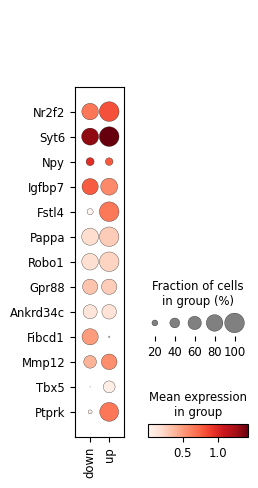

In [33]:
s1_data = sc.read_h5ad("C:/Users/james/Downloads/RNAseq for James/RNAseq for James/cuffnorm_output/Spig1_final_Scanpy.h5ad")
sc.pl.dotplot(s1_data, marker_genes, groupby='direction',swap_axes=True)

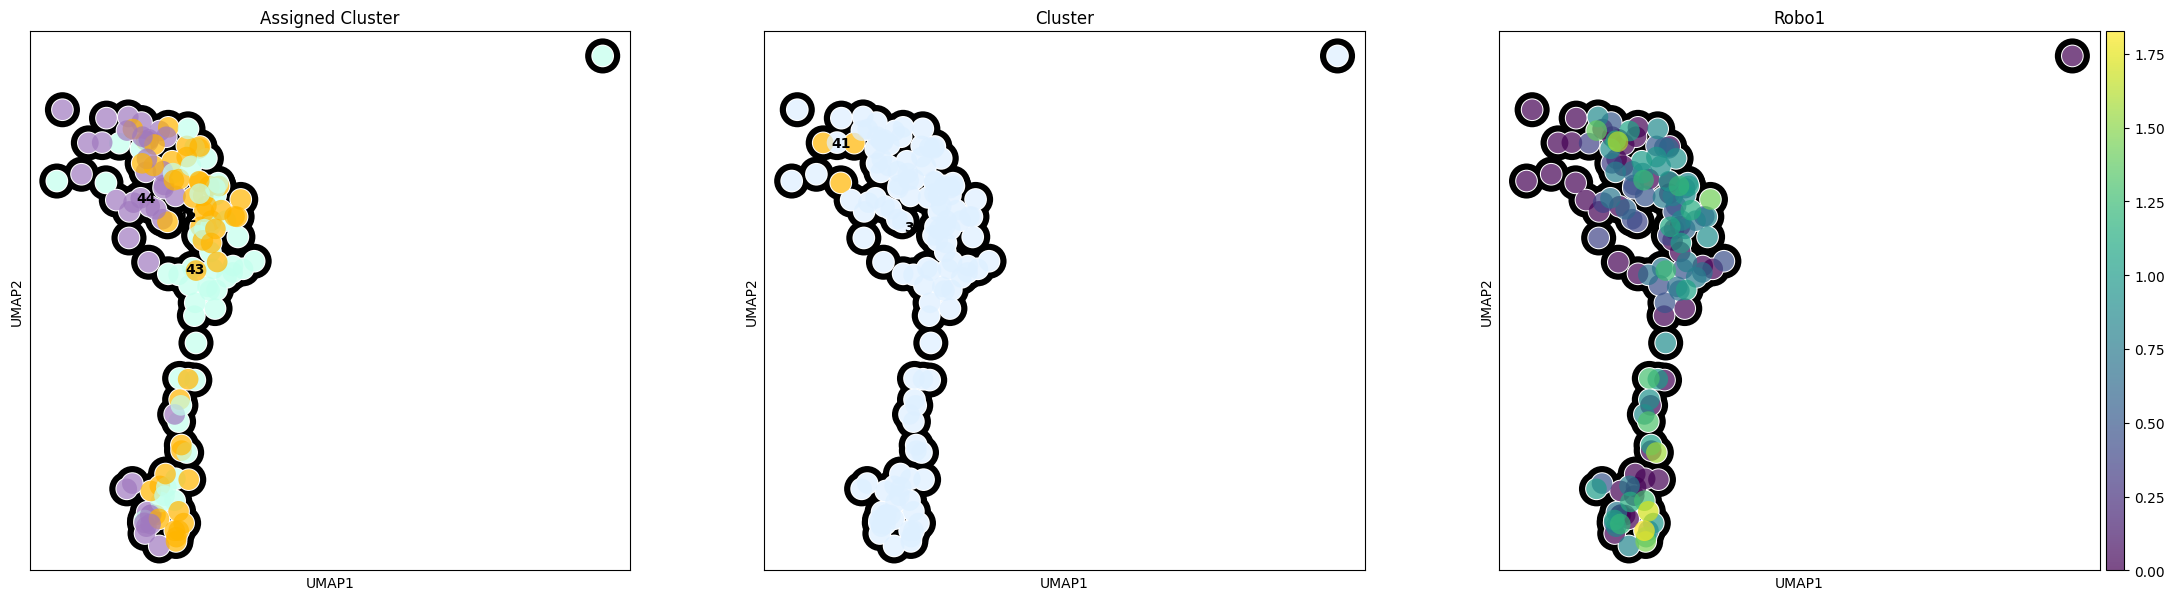

In [50]:
#adata = sc.read_h5ad("C:/Users/james/Downloads/RNAseq for James/RNAseq for James/cuffnorm_output/Spig1_final_Scanpy.h5ad")
#sc.pl.umap(adata,color=['leiden','direction','age','DS'],legend_loc='on data', add_outline=True)

#age:[4, 5, 7, 8, 10, 12]
#direction: ['up', 'down']
#DS: ['PreDS', 'PostDS']
adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_subclustered32_scanpy.h5ad")
FIGSIZE=(8,7)
rcParams['figure.figsize']=FIGSIZE
clusters = ['42','43','44']

adata_subset = adata[adata.obs['Assigned Cluster'].isin(clusters),:].copy()
sc.pl.umap(adata_subset,color=['Assigned Cluster','Cluster','Robo1'],legend_loc='on data', add_outline=True)

In [51]:
adata.uns['rank_genes_groups']

{'logfoldchanges': array([( 1.8544562 ,  1.2817019,  4.364398 ,  3.7698874,  4.4999375,  3.9282386,  4.669728 ,  3.9539933,  1.9294276,  2.6078198,  4.7476463,  2.4539313,   1.4076371,  4.034069 ,   8.5919   ,  3.655249 ,  7.0896297,  3.0655375,  3.5064518,  4.38716  ,  3.1208453,   4.348929 ,   4.6223516,   2.9868352,   3.3224568,  2.6753676,   4.046982 ,  4.0995383,  3.5935922,   3.7388768,   1.9600329,  3.1214743,   3.8000278,   2.984091 ,  3.4275248,   3.0740952,   6.327904 ,   1.5126381,   1.6912748,   5.1709566,   3.6237566,   2.5391493),
        ( 1.122218  ,  2.387104 ,  4.4138627,  2.9386895,  2.8334787,  2.537083 ,  3.3226228,  3.663783 ,  2.6110747,  2.538292 ,  3.503396 ,  2.3640385,   2.3587275,  5.6874166,   1.684404 ,  2.2276773,  4.588314 ,  3.225093 ,  3.7440052,  6.302497 ,  3.9717097,   2.9235573,   2.4738555,   1.2739795,   1.6787322,  5.2685323,   2.1380067,  3.5424492,  2.7608335,   3.151411 ,   2.6360116,  2.6352916,   2.7274387,   1.3468344,  3.8674016,   2.2976

In [52]:
#generate dataset of DEGs
result = adata_subset.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [ ]:
degs['neglogpvals'] = np.log10(degs['pvals']) * -1
degs

names     scores         pvals     pvals_adj  logfoldchanges  \
0        Nr2f2  18.864164  2.247975e-79  3.060843e-75        4.968033   
1         Syt6  18.280155  1.190867e-74  8.107421e-71        4.997112   
2       Pou6f2  18.059214  6.676756e-73  3.030357e-69        2.935549   
3         Igf1  18.013342  1.530996e-72  5.211512e-69        4.372015   
4      Gucy1a1  17.220779  1.854740e-66  5.050829e-63        2.747432   
...        ...        ...           ...           ...             ...   
13611    Cpne4 -12.481693  9.396724e-36  2.907859e-33       -3.639231   
13612   Pou4f1 -12.509201  6.648970e-36  2.105404e-33       -1.790742   
13613   Stk32c -12.540684  4.471197e-36  1.449520e-33       -1.373495   
13614   Rbpms2 -14.279274  2.946549e-46  1.744357e-43       -1.272910   
13615    Calb2 -16.378029  2.744950e-60  4.152804e-57       -2.861517   

       neglogpvals  
0        78.648208  
1        73.924137  
2        72.175435  
3        71.815026  
4        65.731717  
...            ...  
13611    35.027024  
13612    35.177246  
13613    35.349576  
13614    45.530686  
13615    59.561466  

[13616 rows x 6 columns]

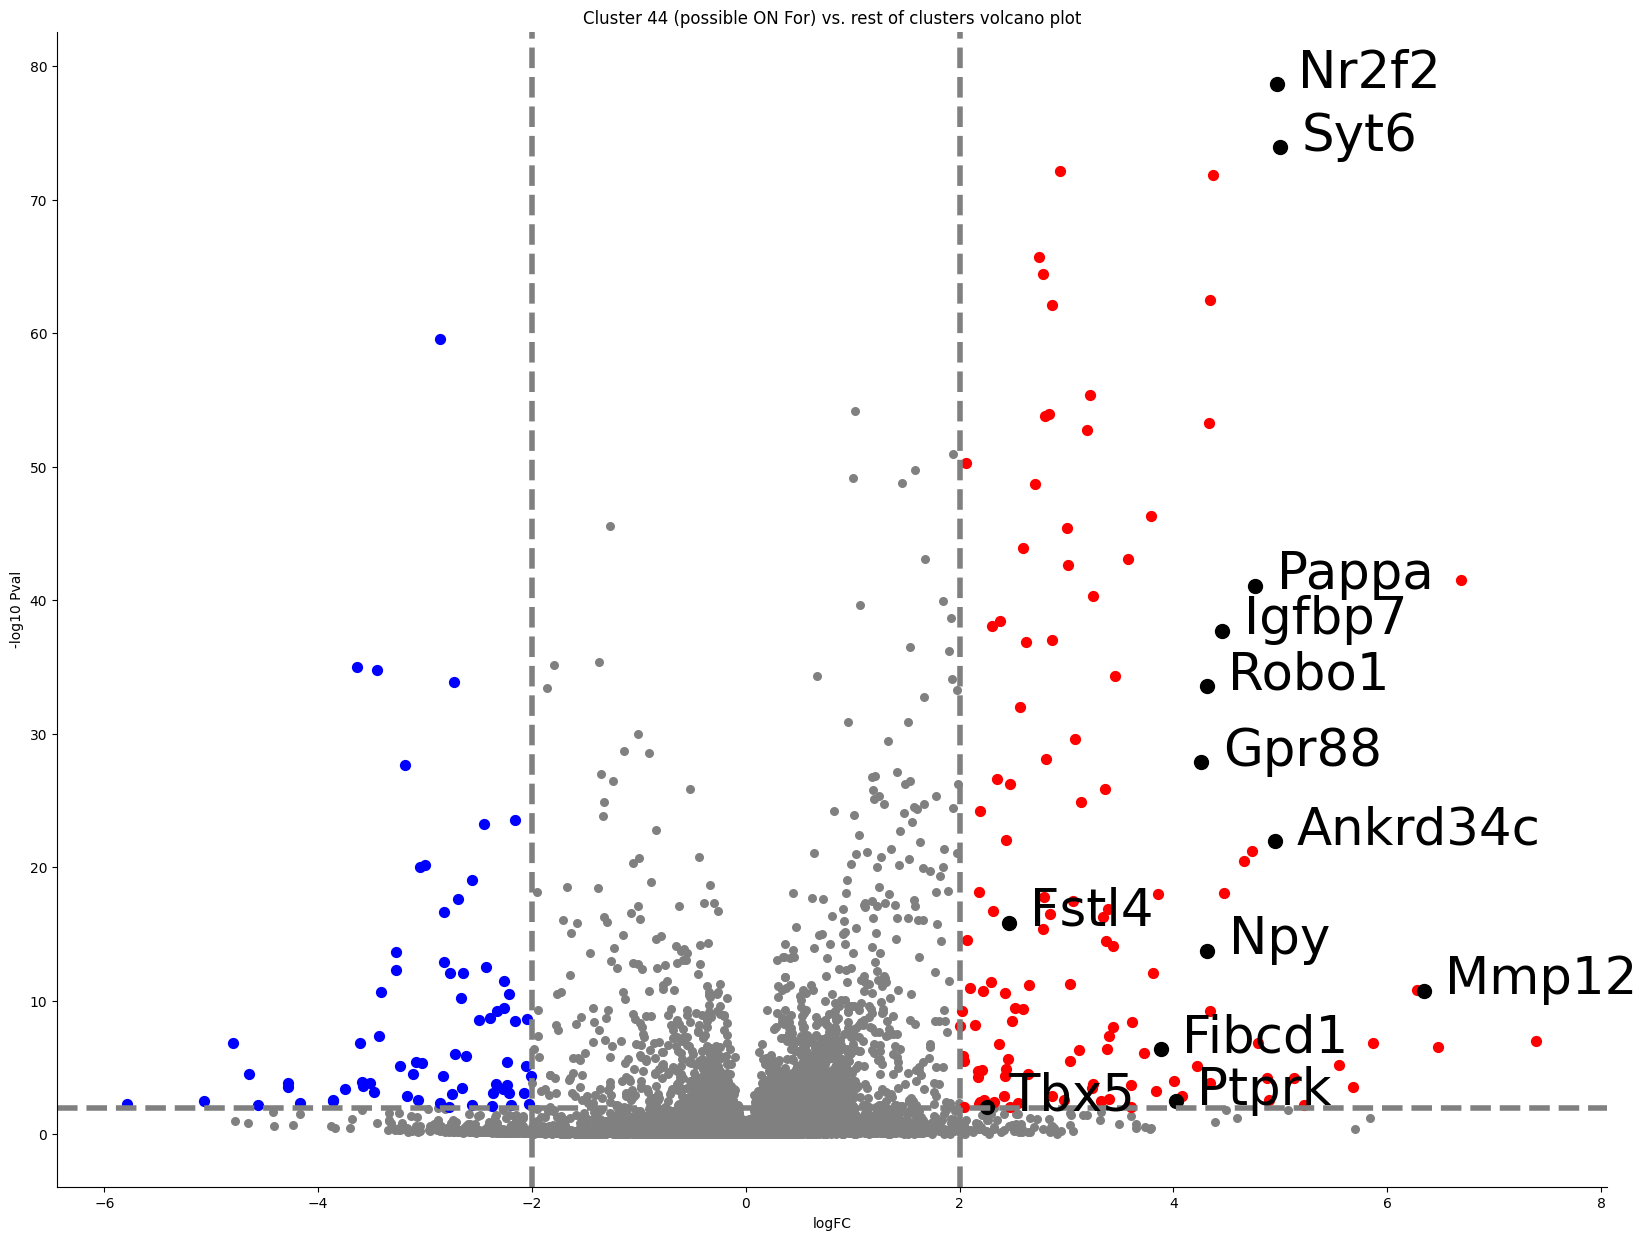

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
FIGSIZE=(1,2)
rcParams['figure.figsize']=FIGSIZE

#unfiltered:
#degsub = degs

#filtered:
degsub = degs[degs['logfoldchanges'] < 10]
degsub = degsub[degsub['logfoldchanges'] > -10]

plt.figure(figsize=(20,15))
plt.scatter(x=degsub['logfoldchanges'],y=degsub['neglogpvals'],s=30,color='grey')
plt.xlabel('logFC')
plt.ylabel('-log10 Pval')

down = degsub[(degsub['logfoldchanges']<=-2)&(degsub['pvals']<=0.01)]
up = degsub[(degsub['logfoldchanges']>=2)&(degsub['pvals']<=0.01)]

plt.scatter(x=down['logfoldchanges'],y=down['pvals'].apply(lambda x:-np.log10(x)),s=50,label="Rest",color="blue")
for i,r in down.iterrows():
    if r['names'] in marker_genes:
        plt.scatter(r['logfoldchanges'], -np.log10(r['pvals']), color="black", s=50)  # Black dot for named genes
        plt.text(x=r['logfoldchanges']+0.2, y=-np.log10(r['pvals'])+0.2, s=r['names'],fontsize = 50)

plt.scatter(x=up['logfoldchanges'],y=up['pvals'].apply(lambda x:-np.log10(x)),s=50,label="44",color="red")
for i,r in up.iterrows():
    if r['names'] in marker_genes:
        plt.scatter(r['logfoldchanges'], -np.log10(r['pvals']), color="black", s=100)  # Black dot for named genes
        plt.text(x=r['logfoldchanges']+ 0.2, y=-np.log10(r['pvals'])-0.2, s=r['names'],fontsize=37)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)

plt.axvline(-2,color="grey",linestyle="--",linewidth=4)
plt.axvline(2,color="grey",linestyle="--",linewidth=4)
plt.axhline(2,color="grey",linestyle="--",linewidth=4)
plt.title("Cluster 44 (possible ON For) vs. rest of clusters volcano plot")
plt.savefig("D:/Lab/Robo1 Figures/SVGs/Robo1_mouse_volcano_plot.tiff", format="tiff", dpi=1000)
#plt.legend()

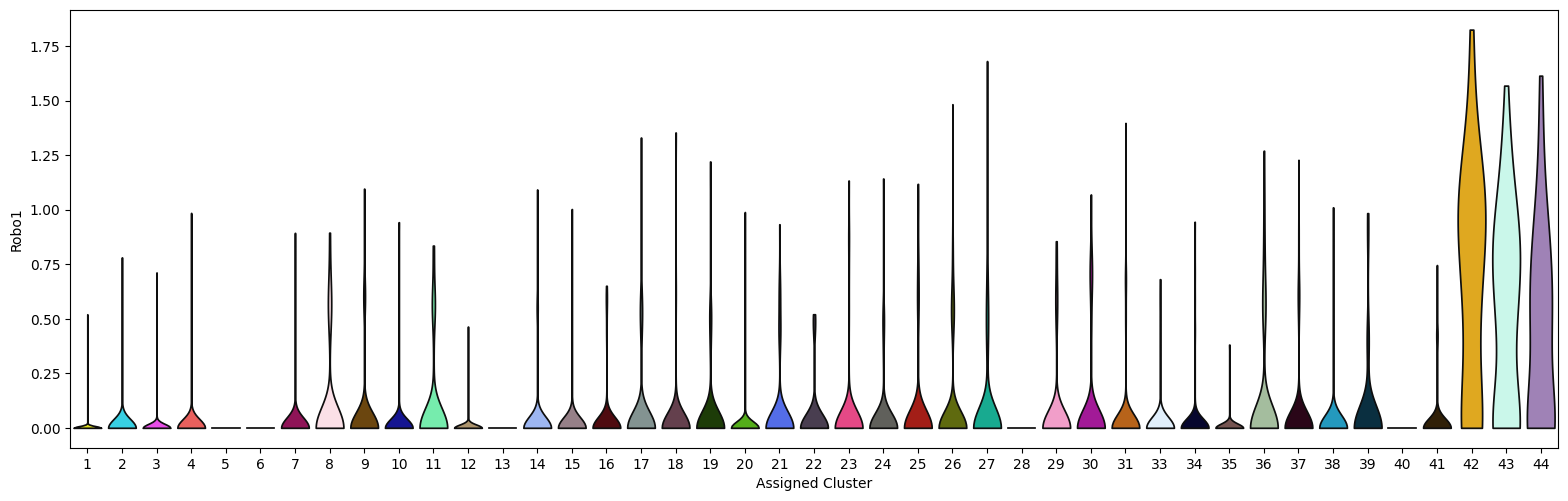

In [ ]:
#Ceacam10, Rxfp3, F2rl1, Gpc4
FIGSIZE=(15,6)
rcParams['figure.figsize']=FIGSIZE
adata = sc.read_h5ad("F:/Lab/trakthenberg/trak_final_subclustered32_scanpy.h5ad")
sc.pl.violin(adata, ['Robo1'], groupby='Assigned Cluster', size=0)